<a href="https://colab.research.google.com/github/Pietro55555/PRiR/blob/main/Lab11/Lab11_2/Lab11_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

doistalowujemy biblioteke tensorflow

In [ ]:
pip install --upgrade tensorflow

Wczytujemy dane z których skorzystamy.

In [34]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

Normalizujemy dane oraz sprawdzamy jaką liczbe przypomina ten kształt

In [35]:
import matplotlib.pyplot as plt
import tensorflow as tf  # deep learning library. Tensors are just multi-dimensional arrays
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


mnist = tf.keras.datasets.mnist  # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

x_train = tf.keras.utils.normalize(x_train, axis=1)  # scales data between 0 and 1
x_test = tf.keras.utils.normalize(x_test, axis=1)  # scales data between 0 and 1

model = tf.keras.models.Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

model.fit(x_train, y_train, epochs=3)  # train the model

val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2634 - accuracy: 0.9226
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1075 - accuracy: 0.9665
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.0978 - accuracy: 0.9702
0.09784846752882004
0.9702000021934509


Wypisujemy dane z których korzystamy

In [38]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Pokazujemy efekty naszego algorytmu

INFO:tensorflow:Assets written to: epic_num_reader.model/assets
7


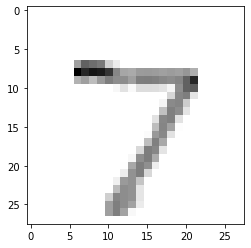

2


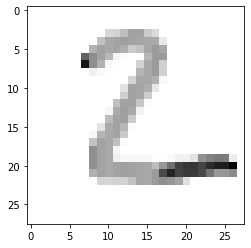

1


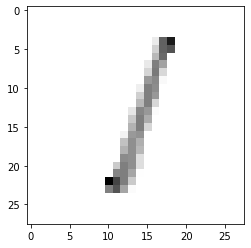

0


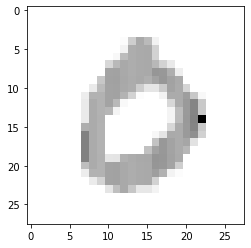

4


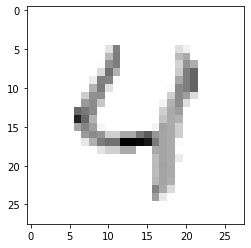

In [37]:
model.save('epic_num_reader.model')
new_model = tf.keras.models.load_model('epic_num_reader.model')
predictions = new_model.predict(x_test)

import numpy as np
for x in range(5):
  print(np.argmax(predictions[x]))
  plt.imshow(x_test[x],cmap=plt.cm.binary)
  plt.show()

